In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
data= pd.read_csv("/Users/yangpan/Desktop/School UMSL/CS4300Ai/cleaned.csv")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from functools import *

import pickle
import joblib

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data.head()

,Unnamed: 0,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,0,0.052632,5,18,1,0.071429,0.310606,0.000000,0.012346,...,-20,-20,-20,-20,-20,-20,-20,-1,-1,0
1,1,0,0.157895,1,1,7,0.214286,0.446970,0.000000,0.222222,...,-20,10,-20,-20,-20,-20,-20,1,1,0
2,2,0,0.263158,1,1,7,0.142857,0.083333,0.833333,0.160494,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,3,1,0.368421,1,1,7,0.142857,0.333333,0.166667,0.197531,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,4,1,0.473684,1,1,7,0.071429,0.386364,0.000000,0.098765,...,-20,0,-20,-20,-20,-20,-20,1,1,0


In [3]:
data.dtypes

Unnamed: 0                    int64
gender                       object
age                         float64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital            float64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                 

In [4]:
data.gender.drop_duplicates()

0                      0
3                      1
16384                  1
16385                  0
22587    Unknown/Invalid
Name: gender, dtype: object

In [5]:
indexNames = data[(data['gender'] == 'Unknown/Invalid') ].index
# Delete these row indexes from dataFramedf.drop(indexNames , inplace=True)

data.drop(indexNames , inplace=True)

In [6]:
data['gender'] = data.gender.astype(float)

In [7]:
#pd.to_numeric(data)

In [8]:
data = data.drop(['diag_1', 'diag_2', 'diag_3'], axis=1)

In [9]:
data.dtypes

Unnamed: 0                    int64
gender                      float64
age                         float64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital            float64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
number_diagnoses            float64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                   int64
pioglitazone                  int64
rosiglitazone                 int64
acarbose                    

In [10]:
data['readmitted'].unique()

array([0, 1])

In [11]:
y = data[data.columns[-1]] #selects last column 
X = data.loc[:, data.columns != 'readmitted'] #selects every column except last column



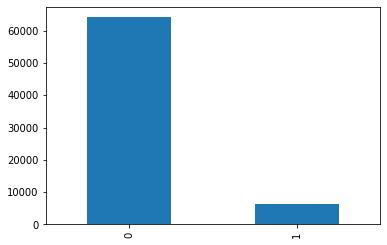

In [12]:
pd.value_counts(data['readmitted']).plot.bar()

In [13]:
len(X.columns)

41

In [14]:
X = np.asarray(X)
y = np.asarray(y)

In [15]:
print (X.shape, y.shape)

(70431, 41) (70431,)


In [16]:
X

array([[ 0.00000000e+00,  0.00000000e+00,  5.26315789e-02, ...,
        -2.00000000e+01, -1.00000000e+00, -1.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.57894737e-01, ...,
        -2.00000000e+01,  1.00000000e+00,  1.00000000e+00],
       [ 2.00000000e+00,  0.00000000e+00,  2.63157895e-01, ...,
        -2.00000000e+01, -1.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.01756000e+05,  0.00000000e+00,  6.84210526e-01, ...,
        -2.00000000e+01, -1.00000000e+00,  1.00000000e+00],
       [ 1.01758000e+05,  0.00000000e+00,  8.94736842e-01, ...,
        -2.00000000e+01,  1.00000000e+00,  1.00000000e+00],
       [ 1.01765000e+05,  1.00000000e+00,  7.89473684e-01, ...,
        -2.00000000e+01, -1.00000000e+00, -1.00000000e+00]])

In [17]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state = 101)
#X_resampled, y_resampled = smote.fit_resample(X, y )

In [18]:
from imblearn.combine import SMOTEENN
smenn=SMOTEENN()
X_resampled, y_resampled = smenn.fit_resample(X, y )

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [20]:
from tensorflow.keras.utils import plot_model
#plot_model(model, show_layer_names=True, show_shapes=True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)



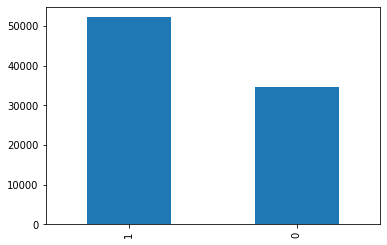

In [23]:
pd.value_counts(y_resampled).plot.bar()

In [24]:
#X_train2, X_test2, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
X_train

array([[ 2.07130000e+04,  0.00000000e+00,  6.84210526e-01, ...,
        -2.00000000e+01,  1.00000000e+00,  1.00000000e+00],
       [ 4.03365281e+04,  3.55804946e-01,  9.25093696e-01, ...,
        -2.00000000e+01,  2.88390108e-01,  2.88390108e-01],
       [ 9.20920000e+04,  0.00000000e+00,  7.89473684e-01, ...,
        -2.00000000e+01, -1.00000000e+00,  1.00000000e+00],
       ...,
       [ 7.86516527e+04,  1.00000000e+00,  7.65983720e-01, ...,
        -2.00000000e+01, -1.00000000e+00, -1.00000000e+00],
       [ 4.68416676e+04,  1.00000000e+00,  7.89473684e-01, ...,
        -2.00000000e+01,  1.00000000e+00,  1.00000000e+00],
       [ 3.39731794e+04,  6.55673284e-01,  8.58491925e-01, ...,
        -2.00000000e+01,  3.11346568e-01,  1.00000000e+00]])

In [26]:
y_train

array([0, 1, 0, ..., 1, 1, 1])

In [27]:
X.shape

(70431, 41)

In [28]:
X_train.shape

(69480, 41)

In [29]:
y_test.shape

(17370,)

In [30]:
## Baseline Model #1 , with 2 hidden layer
model1 = Sequential()
model1.add(Dense(16, input_dim = len(X_train[0, :]), activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [31]:
## Baseline Model #2 , 1 hidden layer
model2 = Sequential()
model2.add(Dense(8, input_dim = len(X_train[0, :]), activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [32]:
## Baseline Model #3 , no hidden layer
model3 = Sequential()
model3.add(Dense(32, input_dim = len(X_train[0, :]), activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [33]:
## Baseline Model #4
model4 = Sequential()
model4.add(Dense(32, input_dim = len(X_train[0, :]), activation='relu'))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(4, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

In [34]:
## Model using sigmoid activation (only last neuron)
modelA = Sequential()
modelA.add(Dense(32, input_dim = len(X_train[0, :]), activation='relu'))
modelA.add(Dense(16, activation='relu'))
modelA.add(Dense(8, activation='relu'))

modelA.add(Dense(4, activation='relu'))
modelA.add(Dense(1, activation='sigmoid'))

In [35]:
## Model using sigmoid activation (all neurons)
modelB = Sequential()
modelB.add(Dense(32, input_dim = len(X_train[0, :]), activation='sigmoid'))
modelB.add(Dense(16, activation='sigmoid'))
modelB.add(Dense(8, activation='sigmoid'))
modelB.add(Dense(4, activation='sigmoid'))
modelB.add(Dense(1, activation='sigmoid'))

In [36]:
## Model using linear activation (all neurons)
modelC = Sequential()
modelC.add(Dense(32, input_dim = len(X_train[0, :]), activation='linear'))
modelC.add(Dense(16, input_dim = len(X_train[0, :]), activation='linear'))
modelC.add(Dense(8, input_dim = len(X_train[0, :]), activation='linear'))
modelC.add(Dense(4, activation='linear'))
modelC.add(Dense(1, activation='linear'))

In [37]:
modelD = Sequential()
modelD.add(Dense(32, input_dim = len(X_train[0, :]), activation='relu'))
modelD.add(Dense(16, activation='relu'))
modelD.add(Dense(8, activation='relu'))
modelD.add(Dense(4, activation='relu'))
modelD.add(Dense(1, activation='linear'))

In [38]:
#Overfitting
modelO = Sequential()
modelO.add(Dense(80, input_dim = len(X_train[0, :]), activation=partial(tf.nn.leaky_relu, alpha=0.1)))
modelO.add(Dense(40, activation=partial(tf.nn.leaky_relu, alpha=0.1)))
modelO.add(Dense(1, activation='sigmoid'))

In [39]:
#Overfitting
modelO2 = Sequential()
modelO2.add(Dense(320, input_dim = len(X_train[0, :]), activation=partial(tf.nn.leaky_relu, alpha=0.1)))
modelO2.add(Dense(160, activation=partial(tf.nn.leaky_relu, alpha=0.1)))
modelO2.add(Dense(1, activation='sigmoid'))

In [40]:
## Compile our model
model1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model3.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model4.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


modelA.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
modelD.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
modelC.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
modelB.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

modelO.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

modelO2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [41]:
#ypredO2model = modelO.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 256, batch_size=64, verbose = 0)

In [42]:
#ypredOmodel = modelO.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 256, batch_size=64, verbose = 0)

In [43]:

#model1.fit(x = X_train, y = y_train, epochs = 256, verbose = 1)

In [44]:
#model1Pred = model1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 128, batch_size=32, verbose = 1)

In [45]:
#model2Pred = model2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 128, batch_size=32, verbose = 1)

In [46]:
#model3Pred = model3.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 128, batch_size=32, verbose = 1)

In [47]:
#model4Pred = model4.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 128, batch_size=32, verbose = 1)

In [48]:
#modelAPred = modelA.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 256, batch_size=64, verbose = 1)

In [49]:
modelBPred = modelB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 128, batch_size=32, verbose = 1)

Train on 69480 samples, validate on 17370 samples
Epoch 1/128
69480/69480 [==============================] - 6s 88us/sample - loss: 0.6734 - accuracy: 0.5994 - val_loss: 0.6692 - val_accuracy: 0.6092
Epoch 2/128
69480/69480 [==============================] - 5s 73us/sample - loss: 0.6734 - accuracy: 0.5994 - val_loss: 0.6699 - val_accuracy: 0.6092
Epoch 3/128
69480/69480 [==============================] - 5s 72us/sample - loss: 0.6734 - accuracy: 0.5994 - val_loss: 0.6694 - val_accuracy: 0.6092
Epoch 4/128
69480/69480 [==============================] - 5s 71us/sample - loss: 0.6733 - accuracy: 0.5994 - val_loss: 0.6698 - val_accuracy: 0.6092
Epoch 5/128
69480/69480 [==============================] - 5s 72us/sample - loss: 0.6734 - accuracy: 0.5994 - val_loss: 0.6691 - val_accuracy: 0.6092
Epoch 6/128
69480/69480 [==============================] - 5s 72us/sample - loss: 0.6733 - accuracy: 0.5994 - val_loss: 0.6696 - val_accuracy: 0.6092
Epoch 7/128
69480/69480 [=========================

Epoch 55/128
69480/69480 [==============================] - 5s 75us/sample - loss: 0.6705 - accuracy: 0.6028 - val_loss: 0.6672 - val_accuracy: 0.6126
Epoch 56/128
69480/69480 [==============================] - 5s 73us/sample - loss: 0.6715 - accuracy: 0.6022 - val_loss: 0.6667 - val_accuracy: 0.6130
Epoch 57/128
69480/69480 [==============================] - 5s 72us/sample - loss: 0.6709 - accuracy: 0.6022 - val_loss: 0.6681 - val_accuracy: 0.6111
Epoch 58/128
69480/69480 [==============================] - 5s 71us/sample - loss: 0.6717 - accuracy: 0.6014 - val_loss: 0.6677 - val_accuracy: 0.6109
Epoch 59/128
69480/69480 [==============================] - 5s 71us/sample - loss: 0.6711 - accuracy: 0.6019 - val_loss: 0.6711 - val_accuracy: 0.6123
Epoch 60/128
69480/69480 [==============================] - 5s 70us/sample - loss: 0.6712 - accuracy: 0.6019 - val_loss: 0.6673 - val_accuracy: 0.6127
Epoch 61/128
69480/69480 [==============================] - 5s 69us/sample - loss: 0.6709 - ac

69480/69480 [==============================] - 5s 67us/sample - loss: 0.6708 - accuracy: 0.6023 - val_loss: 0.6673 - val_accuracy: 0.6120
Epoch 110/128
69480/69480 [==============================] - 5s 67us/sample - loss: 0.6710 - accuracy: 0.6023 - val_loss: 0.6660 - val_accuracy: 0.6126
Epoch 111/128
69480/69480 [==============================] - 5s 66us/sample - loss: 0.6704 - accuracy: 0.6022 - val_loss: 0.6647 - val_accuracy: 0.6123
Epoch 112/128
69480/69480 [==============================] - 5s 65us/sample - loss: 0.6703 - accuracy: 0.6023 - val_loss: 0.6664 - val_accuracy: 0.6122
Epoch 113/128
69480/69480 [==============================] - 5s 65us/sample - loss: 0.6705 - accuracy: 0.6023 - val_loss: 0.6667 - val_accuracy: 0.6122
Epoch 114/128
69480/69480 [==============================] - 5s 68us/sample - loss: 0.6706 - accuracy: 0.6024 - val_loss: 0.6671 - val_accuracy: 0.6122
Epoch 115/128
69480/69480 [==============================] - 5s 70us/sample - loss: 0.6707 - accuracy:

In [50]:
#modelCPred = modelC.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 256, batch_size=64, verbose = 1)

In [51]:
modelDPred = modelB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 256, batch_size=64, verbose = 1)

Train on 69480 samples, validate on 17370 samples
Epoch 1/256
69480/69480 [==============================] - 3s 37us/sample - loss: 0.6698 - accuracy: 0.6033 - val_loss: 0.6669 - val_accuracy: 0.6126
Epoch 2/256
69480/69480 [==============================] - 3s 37us/sample - loss: 0.6698 - accuracy: 0.6030 - val_loss: 0.6661 - val_accuracy: 0.6126
Epoch 3/256
69480/69480 [==============================] - 3s 37us/sample - loss: 0.6699 - accuracy: 0.6031 - val_loss: 0.6674 - val_accuracy: 0.6127
Epoch 4/256
69480/69480 [==============================] - 3s 38us/sample - loss: 0.6698 - accuracy: 0.6030 - val_loss: 0.6665 - val_accuracy: 0.6127
Epoch 5/256
69480/69480 [==============================] - 3s 38us/sample - loss: 0.6698 - accuracy: 0.6033 - val_loss: 0.6664 - val_accuracy: 0.6127
Epoch 6/256
69480/69480 [==============================] - 3s 38us/sample - loss: 0.6700 - accuracy: 0.6026 - val_loss: 0.6662 - val_accuracy: 0.6125
Epoch 7/256
69480/69480 [=========================

Epoch 55/256
69480/69480 [==============================] - 3s 37us/sample - loss: 0.6700 - accuracy: 0.6027 - val_loss: 0.6666 - val_accuracy: 0.6124
Epoch 56/256
69480/69480 [==============================] - 3s 37us/sample - loss: 0.6706 - accuracy: 0.6023 - val_loss: 0.6662 - val_accuracy: 0.6126
Epoch 57/256
69480/69480 [==============================] - 2s 35us/sample - loss: 0.6701 - accuracy: 0.6026 - val_loss: 0.6666 - val_accuracy: 0.6127
Epoch 58/256
69480/69480 [==============================] - 2s 35us/sample - loss: 0.6701 - accuracy: 0.6024 - val_loss: 0.6663 - val_accuracy: 0.6124
Epoch 59/256
69480/69480 [==============================] - 2s 35us/sample - loss: 0.6698 - accuracy: 0.6026 - val_loss: 0.6663 - val_accuracy: 0.6124
Epoch 60/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6700 - accuracy: 0.6026 - val_loss: 0.6661 - val_accuracy: 0.6124
Epoch 61/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6705 - ac

69480/69480 [==============================] - 2s 34us/sample - loss: 0.6704 - accuracy: 0.6021 - val_loss: 0.6674 - val_accuracy: 0.6111
Epoch 110/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6700 - accuracy: 0.6025 - val_loss: 0.6668 - val_accuracy: 0.6116
Epoch 111/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6698 - accuracy: 0.6031 - val_loss: 0.6663 - val_accuracy: 0.6127
Epoch 112/256
69480/69480 [==============================] - 2s 33us/sample - loss: 0.6701 - accuracy: 0.6028 - val_loss: 0.6667 - val_accuracy: 0.6123
Epoch 113/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6703 - accuracy: 0.6025 - val_loss: 0.6661 - val_accuracy: 0.6127
Epoch 114/256
69480/69480 [==============================] - 2s 33us/sample - loss: 0.6700 - accuracy: 0.6028 - val_loss: 0.6664 - val_accuracy: 0.6128
Epoch 115/256
69480/69480 [==============================] - 2s 33us/sample - loss: 0.6708 - accuracy:

Epoch 163/256
69480/69480 [==============================] - 2s 33us/sample - loss: 0.6706 - accuracy: 0.6016 - val_loss: 0.6674 - val_accuracy: 0.6106
Epoch 164/256
69480/69480 [==============================] - 2s 33us/sample - loss: 0.6705 - accuracy: 0.6013 - val_loss: 0.6681 - val_accuracy: 0.6104
Epoch 165/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6703 - accuracy: 0.6015 - val_loss: 0.6671 - val_accuracy: 0.6112
Epoch 166/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6696 - accuracy: 0.6026 - val_loss: 0.6669 - val_accuracy: 0.6127
Epoch 167/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6693 - accuracy: 0.6029 - val_loss: 0.6662 - val_accuracy: 0.6129
Epoch 168/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6694 - accuracy: 0.6030 - val_loss: 0.6663 - val_accuracy: 0.6127
Epoch 169/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.66

Epoch 217/256
69480/69480 [==============================] - 2s 33us/sample - loss: 0.6697 - accuracy: 0.6029 - val_loss: 0.6660 - val_accuracy: 0.6130
Epoch 218/256
69480/69480 [==============================] - 2s 33us/sample - loss: 0.6695 - accuracy: 0.6032 - val_loss: 0.6677 - val_accuracy: 0.6123
Epoch 219/256
69480/69480 [==============================] - 2s 33us/sample - loss: 0.6697 - accuracy: 0.6031 - val_loss: 0.6664 - val_accuracy: 0.6130
Epoch 220/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6697 - accuracy: 0.6031 - val_loss: 0.6659 - val_accuracy: 0.6126
Epoch 221/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6697 - accuracy: 0.6029 - val_loss: 0.6659 - val_accuracy: 0.6128
Epoch 222/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.6694 - accuracy: 0.6032 - val_loss: 0.6659 - val_accuracy: 0.6128
Epoch 223/256
69480/69480 [==============================] - 2s 34us/sample - loss: 0.66

In [52]:
def model_evaluation(xvalid, yvalid, model):
    scores = model.evaluate(xvalid, yvalid)
    for i in range(len(scores)):
        print("%s: %.2f%%" % (model.metrics_names[i], scores[i]*100))

    ypred = model.predict(xvalid)
    ypred = (ypred > 0.5)
    cm = confusion_matrix(yvalid, ypred)
    acc = (cm[0, 0] + cm[1, 1]) / sum(cm.flatten()) * 100
    print("\n%s" % cm)
    print("%s%%\n" % acc)

    accuracy = accuracy_score(yvalid, ypred.round()) * 100.0
    precision = precision_score(yvalid, ypred.round()) * 100.0
    recall = recall_score(yvalid, ypred.round()) * 100.0
    f1score = f1_score(yvalid, ypred.round())

    print("Accuracy: %.2f%%" % (accuracy))
    print("Precision: %.2f%%" % (precision))
    print("Recall: %.2f%%" % (recall))
    print("F1-score: %.2f\n" % (f1score))

    for i in range(10):
	    print("X=%s, Predicted=%s" % (X_test[i], ypred[i]))
    return ypred

In [53]:
#ypred1 = model_evaluation(X_test, y_test, model1)

In [54]:
#ypred2 = model_evaluation(X_test, y_test, model2)

In [55]:
#ypred3 = model_evaluation(X_test, y_test, model3)

In [56]:
#ypred4 = model_evaluation(X_test, y_test, model4)

In [57]:
#ypredA = model_evaluation(X_test, y_test, modelA)

In [58]:
ypredB = model_evaluation(X_test, y_test, modelB)

17370/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

loss: 66.57%
accuracy: 61.31%

[[   75  6713]
 [    7 10575]]
61.3126079447323%

Accuracy: 61.31%
Precision: 61.17%
Recall: 99.93%
F1-score: 0.76

X=[ 4.64754353e+04  3.12302038e-01  8.22347583e-01  2.24920815e+00
  2.00000000e+00  1.00000000e+00  5.04506706e-01  2.85488868e-01
  2.18717006e-01  2.02944319e-01  1.48715256e-02  0.00000000e+00
  5.73081635e-02  5.42981123e-01  0.00000000e+00  0.00000000e+00
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01  3.12302038e+00 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -3.75395923e-01
  1.00000000e+00], Predicted=[ True]
X=[ 6.02168276e+04  2.79555851e-01  4.86128779e-01  1.00000000e+00
  1.00000000e+00  7.00000000e+00  1.11365122e-01  1.73589257e-01
  4.65926418e-02  7.89849291e-02

In [59]:
#ypredC = model_evaluation(X_test, y_test, modelC)

In [60]:
#ypredD = model_evaluation(X_test, y_test, modelD)

In [61]:
#ypredO = model_evaluation(X_test, y_test, modelO)

In [62]:
ypredO2 = model_evaluation(X_test, y_test, modelO2)

17370/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

loss: 91234.87%
accuracy: 39.08%

[[ 6788     0]
 [10582     0]]
39.07887161773172%

Accuracy: 39.08%
Precision: 0.00%
Recall: 0.00%
F1-score: 0.00

X=[ 4.64754353e+04  3.12302038e-01  8.22347583e-01  2.24920815e+00
  2.00000000e+00  1.00000000e+00  5.04506706e-01  2.85488868e-01
  2.18717006e-01  2.02944319e-01  1.48715256e-02  0.00000000e+00
  5.73081635e-02  5.42981123e-01  0.00000000e+00  0.00000000e+00
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01  3.12302038e+00 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -3.75395923e-01
  1.00000000e+00], Predicted=[False]
X=[ 6.02168276e+04  2.79555851e-01  4.86128779e-01  1.00000000e+00
  1.00000000e+00  7.00000000e+00  1.11365122e-01  1.73589257e-01
  4.65926418e-02  7.89849291e-

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
def learning_curves_logistic(model_history):
    fig, (ax1) = plt.subplots(1, figsize=(18, 6))
    ax1.plot(model_history.history['loss'])
    ax1.plot(model_history.history['val_loss'])
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.legend(['training loss data', 'validation loss data'], loc='lower right')
   
   

    fig.show()
   

In [64]:
def learning_curves_linear(model_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(model_history.history['loss'])
    ax1.plot(model_history.history['val_loss'])
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.legend(['training loss data', 'validation loss data'], loc='lower right')


    fig.show()

In [65]:
import matplotlib.pyplot as plt
from functools import *

In [66]:
#learning_curves_logistic(ypredOmodel)

In [67]:
#learning_curves_logistic(ypredO2model)

In [68]:
## Baseline Model
#learning_curves_logistic(model1Pred)

In [69]:
#learning_curves_logistic(model2Pred)

In [70]:
#learning_curves_logistic(model3Pred)

In [71]:
#learning_curves_logistic(modelAPred)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


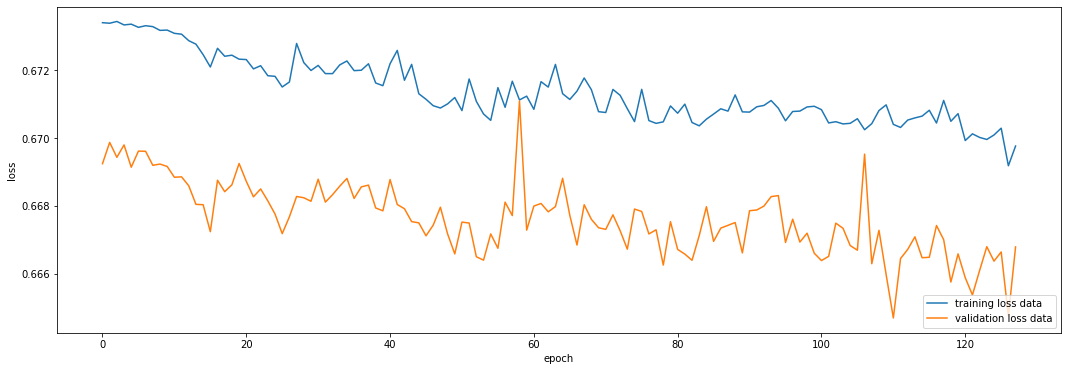

In [72]:
learning_curves_logistic(modelBPred)

In [73]:
#learning_curves_logistic(modelCPred)

In [74]:
#learning_curves_logistic(model4Pred)

In [75]:
#learning_curves_logistic(modelDPred)

In [76]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping()

In [77]:
callback_a = ModelCheckpoint(filepath = modelB, monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience = 10, verbose=1)

In [78]:
history = modelB.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_data = (X_test, y_test), 
    batch_size=40, 
    verbose=1,
    callbacks=[early_stopping]
)

Train on 69480 samples, validate on 17370 samples
Epoch 1/200
69480/69480 [==============================] - 4s 57us/sample - loss: 0.6697 - accuracy: 0.6030 - val_loss: 0.6681 - val_accuracy: 0.6124
Epoch 2/200
69480/69480 [==============================] - 3s 50us/sample - loss: 0.6695 - accuracy: 0.6031 - val_loss: 0.6657 - val_accuracy: 0.6130
Epoch 3/200
69480/69480 [==============================] - 3s 49us/sample - loss: 0.6694 - accuracy: 0.6032 - val_loss: 0.6660 - val_accuracy: 0.6127


In [79]:
dataset = data.sample(frac=1).reset_index(drop=True)

# Convert Pandas DataSet to Numpy Array
dataset_np = dataset.values
X = dataset.drop('readmitted', axis='columns').values
Y = dataset['readmitted'].values
outCol = len(dataset_np[0]) - 1

In [80]:

def learning_curve(m_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(m_history.history['loss'])
    ax1.plot(m_history.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Training loss data', 'Validation loss data'], loc='upper right')

    ax2.plot(m_history.history['accuracy'])
    ax2.plot(m_history.history['val_accuracy'])
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Training accuracy data', 'Validation accuracy data'], loc='lower right')

    fig.show()

In [81]:
callback_a_rem = ModelCheckpoint(filepath = 'modelRem.hdf5', monitor = 'val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b_rem = EarlyStopping(monitor = 'val_accuracy', mode = 'max' , patience = 20, verbose = 0)



In [82]:

modelB = Sequential()
modelB.add(Dense(32, input_dim = len(X_train[0, :]), activation='sigmoid'))
modelB.add(Dense(16, activation='sigmoid'))
modelB.add(Dense(8, activation='sigmoid'))
modelB.add(Dense(4, activation='sigmoid'))
modelB.add(Dense(1, activation='sigmoid'))


modelB.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = modelB.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100 , batch_size=32, verbose = 1, callbacks = [callback_a_rem, callback_b_rem])

Train on 69480 samples, validate on 17370 samples
Epoch 1/100
69120/69480 [============================>.] - ETA: 0s - loss: 0.6747 - accuracy: 0.5945
Epoch 00001: val_accuracy improved from -inf to 0.60921, saving model to modelRem.hdf5
69480/69480 [==============================] - 5s 79us/sample - loss: 0.6747 - accuracy: 0.5946 - val_loss: 0.6694 - val_accuracy: 0.6092
Epoch 2/100
68960/69480 [============================>.] - ETA: 0s - loss: 0.6733 - accuracy: 0.5995 ETA: 0s - loss: 0.6729 
Epoch 00002: val_accuracy did not improve from 0.60921
69480/69480 [==============================] - 4s 62us/sample - loss: 0.6734 - accuracy: 0.5994 - val_loss: 0.6707 - val_accuracy: 0.6092
Epoch 3/100
68640/69480 [============================>.] - ETA: 0s - loss: 0.6735 - accuracy: 0.5992
Epoch 00003: val_accuracy did not improve from 0.60921
69480/69480 [==============================] - 4s 62us/sample - loss: 0.6734 - accuracy: 0.5994 - val_loss: 0.6694 - val_accuracy: 0.6092
Epoch 4/100


Epoch 28/100
68672/69480 [============================>.] - ETA: 0s - loss: 0.6725 - accuracy: 0.6011
Epoch 00028: val_accuracy did not improve from 0.61209
69480/69480 [==============================] - 5s 69us/sample - loss: 0.6725 - accuracy: 0.6012 - val_loss: 0.6689 - val_accuracy: 0.6096
Epoch 29/100
69312/69480 [============================>.] - ETA: 0s - loss: 0.6724 - accuracy: 0.6012
Epoch 00029: val_accuracy did not improve from 0.61209
69480/69480 [==============================] - 5s 66us/sample - loss: 0.6725 - accuracy: 0.6011 - val_loss: 0.6689 - val_accuracy: 0.6104
Epoch 30/100
68608/69480 [============================>.] - ETA: 0s - loss: 0.6725 - accuracy: 0.6008
Epoch 00030: val_accuracy did not improve from 0.61209
69480/69480 [==============================] - 4s 62us/sample - loss: 0.6724 - accuracy: 0.6009 - val_loss: 0.6682 - val_accuracy: 0.6110
Epoch 31/100
68992/69480 [============================>.] - ETA: 0s - loss: 0.6726 - accuracy: 0.6009 ETA: 0s - los

69312/69480 [============================>.] - ETA: 0s - loss: 0.6721 - accuracy: 0.6016
Epoch 00055: val_accuracy did not improve from 0.61232
69480/69480 [==============================] - 5s 69us/sample - loss: 0.6722 - accuracy: 0.6015 - val_loss: 0.6692 - val_accuracy: 0.6105
Epoch 56/100
68768/69480 [============================>.] - ETA: 0s - loss: 0.6724 - accuracy: 0.6013
Epoch 00056: val_accuracy did not improve from 0.61232
69480/69480 [==============================] - 5s 67us/sample - loss: 0.6724 - accuracy: 0.6014 - val_loss: 0.6679 - val_accuracy: 0.6115
Epoch 57/100
68832/69480 [============================>.] - ETA: 0s - loss: 0.6720 - accuracy: 0.6015
Epoch 00057: val_accuracy did not improve from 0.61232
69480/69480 [==============================] - 4s 63us/sample - loss: 0.6720 - accuracy: 0.6015 - val_loss: 0.6681 - val_accuracy: 0.6108
Epoch 58/100
68768/69480 [============================>.] - ETA: 0s - loss: 0.6721 - accuracy: 0.6016
Epoch 00058: val_accuracy 

In [83]:
def get_accuracy(modelB):
    scores = modelB.evaluate(X_train, y_train)
    percent = (scores[1] * 100.0)
    formatted_percent = "{:.2f}".format(percent)
    print("Training set Accuracy: ", formatted_percent , "%")

In [84]:
get_accuracy(modelB)


69480/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Training set Accuracy:  60.12 %


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


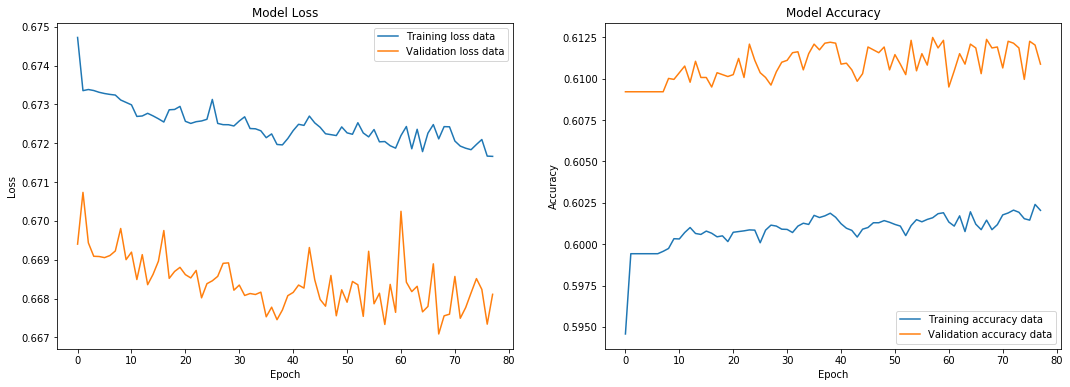

In [85]:
learning_curve(history)

In [86]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
dictRem = {}

for i in range(len(X_train[0])):
  print("Running... ({} / {})".format(i+1, len(X_train[0])))
  # Refresh file for every run
  callback_a_rem = ModelCheckpoint(filepath = 'modelRem.hdf5', monitor = 'val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  callback_b_rem = EarlyStopping(monitor = 'val_accuracy', mode = 'max' , patience = 20, verbose = 0)

  # Model
  modelRem = Sequential()
  modelRem.add(Dense(1, input_dim = 1, activation='sigmoid'))
  modelRem.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  historyRem = modelRem.fit(X_train[:, i], y_train, validation_data=(X_test[:, i], y_test), epochs = 100 , batch_size=32, verbose = 0, callbacks = [callback_a_rem, callback_b_rem])

  modelRem.load_weights('modelRem.hdf5')
  predictionRem = modelRem.predict(X_test[:, i])
  dictRem['{}'.format(i)] = accuracy_score(y_test, predictionRem.round())

Running... (1 / 41)

Epoch 00001: val_accuracy improved from -inf to 0.58066, saving model to modelRem.hdf5

Epoch 00002: val_accuracy improved from 0.58066 to 0.60921, saving model to modelRem.hdf5

Epoch 00003: val_accuracy did not improve from 0.60921

Epoch 00004: val_accuracy did not improve from 0.60921

Epoch 00005: val_accuracy did not improve from 0.60921

Epoch 00006: val_accuracy did not improve from 0.60921

Epoch 00007: val_accuracy did not improve from 0.60921

Epoch 00008: val_accuracy did not improve from 0.60921

Epoch 00009: val_accuracy did not improve from 0.60921

Epoch 00010: val_accuracy did not improve from 0.60921

Epoch 00011: val_accuracy did not improve from 0.60921

Epoch 00012: val_accuracy did not improve from 0.60921

Epoch 00013: val_accuracy did not improve from 0.60921

Epoch 00014: val_accuracy did not improve from 0.60921

Epoch 00015: val_accuracy did not improve from 0.60921

Epoch 00016: val_accuracy did not improve from 0.60921

Epoch 00017: val


Epoch 00012: val_accuracy did not improve from 0.60921

Epoch 00013: val_accuracy did not improve from 0.60921

Epoch 00014: val_accuracy did not improve from 0.60921

Epoch 00015: val_accuracy did not improve from 0.60921

Epoch 00016: val_accuracy did not improve from 0.60921

Epoch 00017: val_accuracy did not improve from 0.60921

Epoch 00018: val_accuracy did not improve from 0.60921

Epoch 00019: val_accuracy did not improve from 0.60921

Epoch 00020: val_accuracy did not improve from 0.60921

Epoch 00021: val_accuracy did not improve from 0.60921
Running... (8 / 41)

Epoch 00001: val_accuracy improved from -inf to 0.62119, saving model to modelRem.hdf5

Epoch 00002: val_accuracy improved from 0.62119 to 0.62136, saving model to modelRem.hdf5

Epoch 00003: val_accuracy improved from 0.62136 to 0.62251, saving model to modelRem.hdf5

Epoch 00004: val_accuracy did not improve from 0.62251

Epoch 00005: val_accuracy did not improve from 0.62251

Epoch 00006: val_accuracy did not imp


Epoch 00002: val_accuracy did not improve from 0.60921

Epoch 00003: val_accuracy did not improve from 0.60921

Epoch 00004: val_accuracy did not improve from 0.60921

Epoch 00005: val_accuracy did not improve from 0.60921

Epoch 00006: val_accuracy did not improve from 0.60921

Epoch 00007: val_accuracy did not improve from 0.60921

Epoch 00008: val_accuracy did not improve from 0.60921

Epoch 00009: val_accuracy did not improve from 0.60921

Epoch 00010: val_accuracy did not improve from 0.60921

Epoch 00011: val_accuracy did not improve from 0.60921

Epoch 00012: val_accuracy did not improve from 0.60921

Epoch 00013: val_accuracy did not improve from 0.60921

Epoch 00014: val_accuracy did not improve from 0.60921

Epoch 00015: val_accuracy improved from 0.60921 to 0.61042, saving model to modelRem.hdf5

Epoch 00016: val_accuracy did not improve from 0.61042

Epoch 00017: val_accuracy did not improve from 0.61042

Epoch 00018: val_accuracy did not improve from 0.61042

Epoch 00019:


Epoch 00007: val_accuracy did not improve from 0.61163

Epoch 00008: val_accuracy did not improve from 0.61163

Epoch 00009: val_accuracy did not improve from 0.61163

Epoch 00010: val_accuracy did not improve from 0.61163

Epoch 00011: val_accuracy did not improve from 0.61163

Epoch 00012: val_accuracy did not improve from 0.61163

Epoch 00013: val_accuracy did not improve from 0.61163

Epoch 00014: val_accuracy did not improve from 0.61163

Epoch 00015: val_accuracy did not improve from 0.61163

Epoch 00016: val_accuracy did not improve from 0.61163

Epoch 00017: val_accuracy did not improve from 0.61163

Epoch 00018: val_accuracy did not improve from 0.61163

Epoch 00019: val_accuracy did not improve from 0.61163

Epoch 00020: val_accuracy did not improve from 0.61163

Epoch 00021: val_accuracy did not improve from 0.61163

Epoch 00022: val_accuracy did not improve from 0.61163

Epoch 00023: val_accuracy did not improve from 0.61163
Running... (18 / 41)

Epoch 00001: val_accuracy 


Epoch 00009: val_accuracy did not improve from 0.60921

Epoch 00010: val_accuracy did not improve from 0.60921

Epoch 00011: val_accuracy did not improve from 0.60921

Epoch 00012: val_accuracy did not improve from 0.60921

Epoch 00013: val_accuracy did not improve from 0.60921

Epoch 00014: val_accuracy did not improve from 0.60921

Epoch 00015: val_accuracy did not improve from 0.60921

Epoch 00016: val_accuracy did not improve from 0.60921

Epoch 00017: val_accuracy did not improve from 0.60921

Epoch 00018: val_accuracy did not improve from 0.60921

Epoch 00019: val_accuracy did not improve from 0.60921

Epoch 00020: val_accuracy did not improve from 0.60921

Epoch 00021: val_accuracy did not improve from 0.60921
Running... (24 / 41)

Epoch 00001: val_accuracy improved from -inf to 0.60921, saving model to modelRem.hdf5

Epoch 00002: val_accuracy did not improve from 0.60921

Epoch 00003: val_accuracy did not improve from 0.60921

Epoch 00004: val_accuracy did not improve from 0.6


Epoch 00042: val_accuracy did not improve from 0.61025

Epoch 00043: val_accuracy did not improve from 0.61025

Epoch 00044: val_accuracy improved from 0.61025 to 0.61031, saving model to modelRem.hdf5

Epoch 00045: val_accuracy improved from 0.61031 to 0.61036, saving model to modelRem.hdf5

Epoch 00046: val_accuracy did not improve from 0.61036

Epoch 00047: val_accuracy did not improve from 0.61036

Epoch 00048: val_accuracy did not improve from 0.61036

Epoch 00049: val_accuracy did not improve from 0.61036

Epoch 00050: val_accuracy did not improve from 0.61036

Epoch 00051: val_accuracy did not improve from 0.61036

Epoch 00052: val_accuracy did not improve from 0.61036

Epoch 00053: val_accuracy did not improve from 0.61036

Epoch 00054: val_accuracy did not improve from 0.61036

Epoch 00055: val_accuracy did not improve from 0.61036

Epoch 00056: val_accuracy did not improve from 0.61036

Epoch 00057: val_accuracy did not improve from 0.61036

Epoch 00058: val_accuracy did not


Epoch 00012: val_accuracy did not improve from 0.60921

Epoch 00013: val_accuracy did not improve from 0.60921

Epoch 00014: val_accuracy did not improve from 0.60921

Epoch 00015: val_accuracy did not improve from 0.60921

Epoch 00016: val_accuracy did not improve from 0.60921

Epoch 00017: val_accuracy did not improve from 0.60921

Epoch 00018: val_accuracy did not improve from 0.60921

Epoch 00019: val_accuracy did not improve from 0.60921

Epoch 00020: val_accuracy did not improve from 0.60921

Epoch 00021: val_accuracy did not improve from 0.60921
Running... (35 / 41)

Epoch 00001: val_accuracy improved from -inf to 0.60610, saving model to modelRem.hdf5

Epoch 00002: val_accuracy improved from 0.60610 to 0.60616, saving model to modelRem.hdf5

Epoch 00003: val_accuracy did not improve from 0.60616

Epoch 00004: val_accuracy improved from 0.60616 to 0.60622, saving model to modelRem.hdf5

Epoch 00005: val_accuracy did not improve from 0.60622

Epoch 00006: val_accuracy improved f


Epoch 00002: val_accuracy did not improve from 0.60921

Epoch 00003: val_accuracy did not improve from 0.60921

Epoch 00004: val_accuracy did not improve from 0.60921

Epoch 00005: val_accuracy did not improve from 0.60921

Epoch 00006: val_accuracy did not improve from 0.60921

Epoch 00007: val_accuracy did not improve from 0.60921

Epoch 00008: val_accuracy did not improve from 0.60921

Epoch 00009: val_accuracy did not improve from 0.60921

Epoch 00010: val_accuracy did not improve from 0.60921

Epoch 00011: val_accuracy did not improve from 0.60921

Epoch 00012: val_accuracy did not improve from 0.60921

Epoch 00013: val_accuracy did not improve from 0.60921

Epoch 00014: val_accuracy did not improve from 0.60921

Epoch 00015: val_accuracy did not improve from 0.60921

Epoch 00016: val_accuracy did not improve from 0.60921

Epoch 00017: val_accuracy did not improve from 0.60921

Epoch 00018: val_accuracy did not improve from 0.60921

Epoch 00019: val_accuracy did not improve from 

In [87]:
sortedDict = {}
for key, value in sorted(dictRem.items(), key=lambda x: x[1]):
  print("Feature", key, ":", value)
  sortedDict[key] = value

Feature 28 : 0.6090961427748992
Feature 0 : 0.6092112838226827
Feature 1 : 0.6092112838226827
Feature 3 : 0.6092112838226827
Feature 4 : 0.6092112838226827
Feature 5 : 0.6092112838226827
Feature 6 : 0.6092112838226827
Feature 8 : 0.6092112838226827
Feature 9 : 0.6092112838226827
Feature 10 : 0.6092112838226827
Feature 11 : 0.6092112838226827
Feature 12 : 0.6092112838226827
Feature 15 : 0.6092112838226827
Feature 17 : 0.6092112838226827
Feature 18 : 0.6092112838226827
Feature 19 : 0.6092112838226827
Feature 20 : 0.6092112838226827
Feature 21 : 0.6092112838226827
Feature 22 : 0.6092112838226827
Feature 23 : 0.6092112838226827
Feature 24 : 0.6092112838226827
Feature 25 : 0.6092112838226827
Feature 26 : 0.6092112838226827
Feature 29 : 0.6092112838226827
Feature 30 : 0.6092112838226827
Feature 31 : 0.6092112838226827
Feature 32 : 0.6092112838226827
Feature 33 : 0.6092112838226827
Feature 36 : 0.6092112838226827
Feature 37 : 0.6092112838226827
Feature 38 : 0.6092112838226827
Feature 39 : 0.6

In [88]:
colNames = list(dataset.columns)
inputNames = colNames[:-1]
sortedLabels =[]
def getList(dict): 
    return list(dict.keys()) 
      
remCols = (getList(sortedDict))

for i in remCols:
  print(i)
  sortedLabels.append(inputNames[int(i)])

28
0
1
3
4
5
6
8
9
10
11
12
15
17
18
19
20
21
22
23
24
25
26
29
30
31
32
33
36
37
38
39
35
27
34
16
2
14
7
13
40


In [89]:
print("Sorted cols: ", remCols)
print("Sorted col label: ", sortedLabels)

Sorted cols:  ['28', '0', '1', '3', '4', '5', '6', '8', '9', '10', '11', '12', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '29', '30', '31', '32', '33', '36', '37', '38', '39', '35', '27', '34', '16', '2', '14', '7', '13', '40']
Sorted col label:  ['miglitol', 'Unnamed: 0', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'A1Cresult', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'glipizide-metformin', 'acarbose', 'glyburide-metformin', 'metformin', 'age', 'max_glu_serum', 'num_lab_procedures', 'number_diagnoses', 'diabetesMed']


In [97]:
X_trainDropDM = np.delete(X_train, 40, 1)

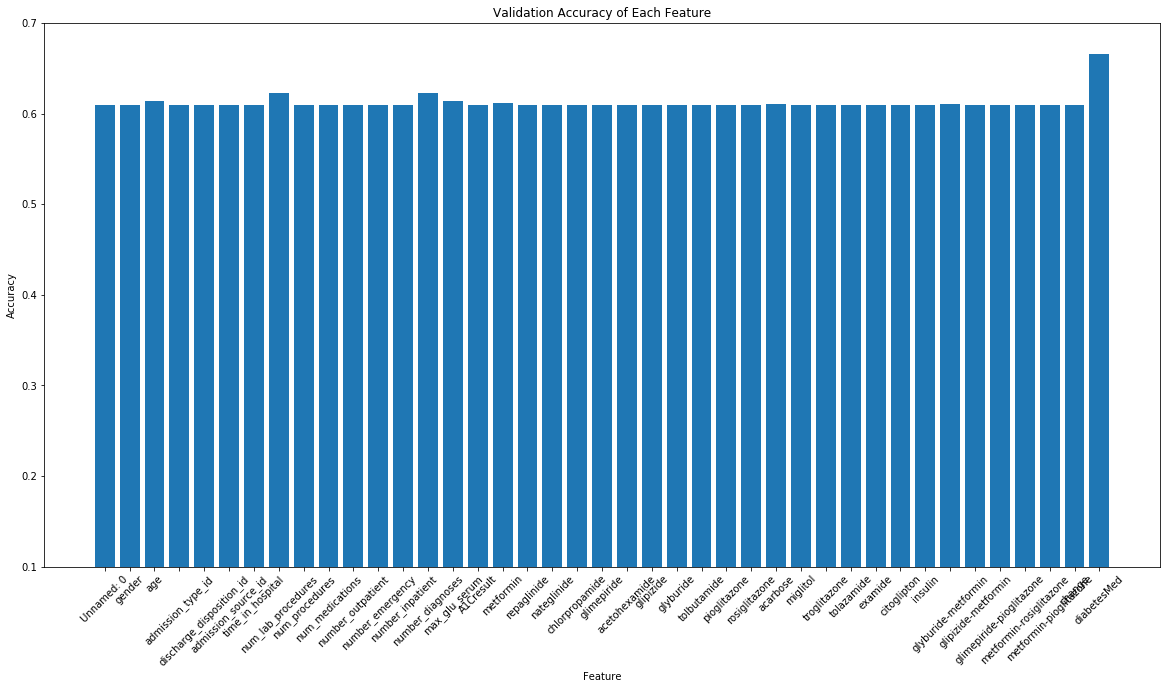

In [91]:
plt.figure(figsize=(20,10))
plt.bar(range(len(dictRem)), list(dictRem.values()), align='center')
plt.xticks(range(len(dictRem)), inputNames, rotation = 45)
plt.ylim(.1, .7)
plt.ylabel('Accuracy')
plt.xlabel('Feature')
plt.title('Validation Accuracy of Each Feature')
plt.show()

In [104]:
X_trainDropDM = np.delete(X_train, 40, 1)

In [105]:
X_testDropDM = np.delete(X_test, 40, 1)

In [112]:

modelB2 = Sequential()
modelB2.add(Dense(32, input_dim = len(X_trainDropDM[0, :]), activation='sigmoid'))
modelB2.add(Dense(16, activation='sigmoid'))
modelB2.add(Dense(8, activation='sigmoid'))
modelB2.add(Dense(4, activation='sigmoid'))
modelB2.add(Dense(1, activation='sigmoid'))

modelB2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [115]:
numCols = len(X_train[0])
inCols = [i for i in range(numCols)]
dictRemIt = {}

print(inCols)
print(remCols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
['28', '0', '1', '3', '4', '5', '6', '8', '9', '10', '11', '12', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '29', '30', '31', '32', '33', '36', '37', '38', '39', '35', '27', '34', '16', '2', '14', '7', '13', '40']


Running... (1 / 41)


NameError: name 'XTRAIN' is not defined

In [151]:
for i in range(numCols):
  print("Running... ({} / {})".format(i+1, numCols))
  callback_a_rem = ModelCheckpoint(filepath = 'modelRemIt.hdf5', monitor = 'val_accuracy', save_best_only = True, save_weights_only = True, verbose = 0)
  callback_b_rem = EarlyStopping(monitor = 'val_accuracy', mode = 'max' , patience = 20, verbose = 0)

  modelRemIt = Sequential()
  modelRemIt.add(Dense(1, input_dim = outCol - i, activation='sigmoid'))
  modelRemIt.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  historyRemIt = modelRemIt.fit(X_train[:,  inCols], y_train, validation_data=(X_test[:, inCols], y_test), epochs = 100, batch_size=32, verbose = 0, callbacks = [callback_a_rem, callback_b_rem])

  

  modelRemIt.load_weights('modelRemIt.hdf5')
  predictionRemIt = modelRemIt.predict(X_test[:, inCols])
  dictRemIt['Removed Feature {}'.format(sortedLabels[i])] = accuracy_score(y_test, predictionRemIt.round())

  inCols.remove(int(remCols[i]))
  print("Removing colomn {}".format(sortedLabels[i]))

Running... (1 / 41)
Removing colomn miglitol
Running... (2 / 41)
Removing colomn Unnamed: 0
Running... (3 / 41)
Removing colomn gender
Running... (4 / 41)
Removing colomn admission_type_id
Running... (5 / 41)
Removing colomn discharge_disposition_id
Running... (6 / 41)
Removing colomn admission_source_id
Running... (7 / 41)
Removing colomn time_in_hospital
Running... (8 / 41)
Removing colomn num_procedures
Running... (9 / 41)
Removing colomn num_medications
Running... (10 / 41)
Removing colomn number_outpatient
Running... (11 / 41)
Removing colomn number_emergency
Running... (12 / 41)
Removing colomn number_inpatient
Running... (13 / 41)
Removing colomn A1Cresult
Running... (14 / 41)
Removing colomn repaglinide
Running... (15 / 41)
Removing colomn nateglinide
Running... (16 / 41)
Removing colomn chlorpropamide
Running... (17 / 41)
Removing colomn glimepiride
Running... (18 / 41)
Removing colomn acetohexamide
Running... (19 / 41)
Removing colomn glipizide
Running... (20 / 41)
Removing c

In [152]:
for key, value in sorted(dictRemIt.items(), key=lambda x: x[1]):
  print(key, ":", value)

Removed Feature number_diagnoses : 0.6398963730569949
Removed Feature miglitol : 0.6427748992515832
Removed Feature acetohexamide : 0.6435233160621762
Removed Feature A1Cresult : 0.6440414507772021
Removed Feature glyburide-metformin : 0.6440414507772021
Removed Feature tolazamide : 0.6442717328727692
Removed Feature metformin : 0.6443868739205527
Removed Feature glipizide : 0.644559585492228
Removed Feature nateglinide : 0.644789867587795
Removed Feature citoglipton : 0.6449050086355785
Removed Feature glimepiride : 0.6449625791594703
Removed Feature insulin : 0.6449625791594703
Removed Feature metformin-pioglitazone : 0.6454231433506045
Removed Feature Unnamed: 0 : 0.6454807138744962
Removed Feature rosiglitazone : 0.645538284398388
Removed Feature max_glu_serum : 0.6455958549222798
Removed Feature change : 0.6457685664939551
Removed Feature num_lab_procedures : 0.646286701208981
Removed Feature pioglitazone : 0.6464594127806563
Removed Feature glyburide : 0.6466321243523316
Removed 

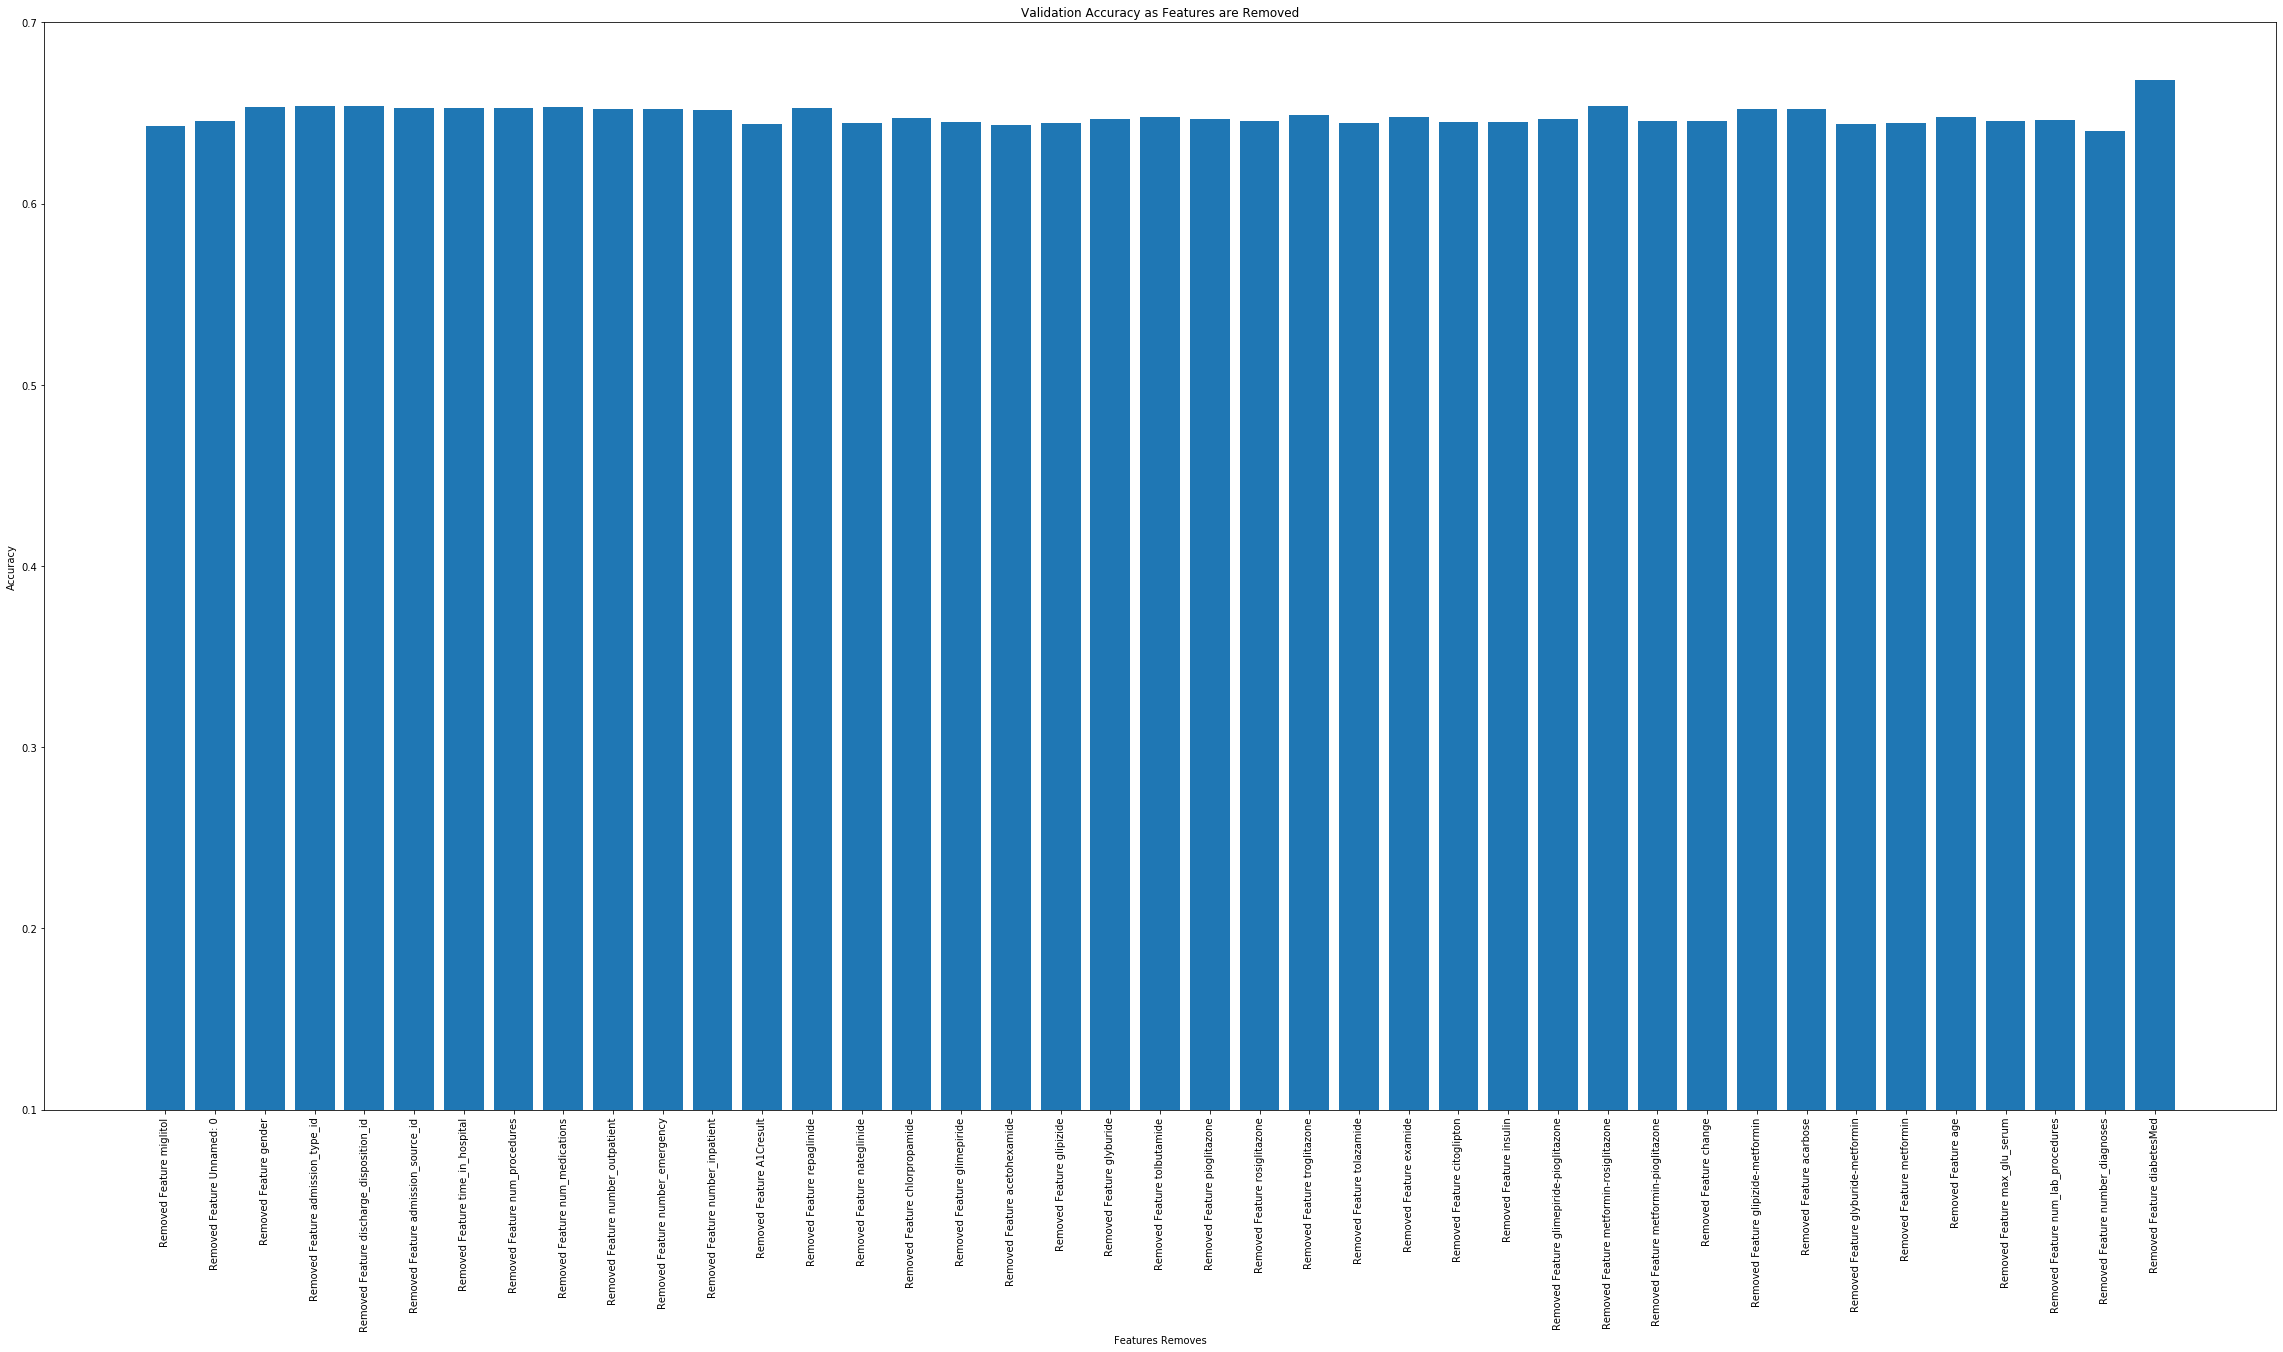

In [167]:

plt.figure(figsize=(40,20))
plt.bar(range(len(dictRemIt)), list(dictRemIt.values()), align='center')
plt.xticks(range(len(dictRemIt)), list(dictRemIt.keys()), rotation = 90)
plt.ylim(.1, .7)
plt.ylabel('Accuracy')
plt.xlabel('Features Removes')
plt.title('Validation Accuracy as Features are Removed')

plt.show()

In [154]:
# New model using only important features

data2 = data.sample(frac=1).reset_index(drop=True)


data2

,Unnamed: 0,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,6342,0.0,0.684211,1,1,7,0.142857,0.250000,0.666667,0.234568,...,-20,-20,-20,-20,-20,-20,-20,1,1,0
1,7506,1.0,0.473684,1,1,7,0.142857,0.439394,0.000000,0.135802,...,-20,-20,-20,-20,-20,-20,-20,-1,-1,1
2,35635,1.0,0.578947,5,1,9,0.071429,0.189394,0.666667,0.197531,...,-20,-20,-20,-20,-20,-20,-20,-1,-1,0
3,17856,0.0,0.263158,1,1,7,0.214286,0.484848,0.000000,0.049383,...,-20,0,-20,-20,-20,-20,-20,-1,1,1
4,69658,0.0,0.894737,1,1,7,0.142857,0.265152,0.000000,0.185185,...,-20,0,-20,-20,-20,-20,-20,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70426,3685,0.0,0.789474,1,2,7,0.214286,0.250000,0.000000,0.074074,...,-20,-10,-20,-20,-20,-20,-20,1,1,0
70427,19568,1.0,0.684211,3,1,4,0.285714,0.106061,0.166667,0.197531,...,-20,0,-20,-20,-20,-20,-20,1,1,0
70428,54280,1.0,0.578947,1,1,1,0.571429,0.545455,0.666667,0.308642,...,-20,-10,-20,-20,-20,-20,-20,1,1,0
70429,20571,1.0,0.368421,3,1,1,0.142857,0.409091,0.500000,0.123457,...,-20,0,-20,-20,-20,-20,-20,-1,1,0


In [155]:
y2 = data2['readmitted'].values

In [156]:
x2 = data2[['diabetesMed', 'age', 'time_in_hospital', 'number_inpatient']]

In [157]:
X2 = np.asarray(x2)
y2 = np.asarray(y2)

In [158]:
from imblearn.combine import SMOTEENN
smenn=SMOTEENN()
X_resampled2, y_resampled2 = smenn.fit_resample(X2, y2 )

In [159]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled2, y_resampled2, test_size=0.2, random_state=0)


In [160]:
## Model using sigmoid activation (all neurons)
modelB2 = Sequential()
modelB2.add(Dense(32, input_dim = len(X_train2[0, :]), activation='sigmoid'))
modelB2.add(Dense(16, activation='sigmoid'))
modelB2.add(Dense(8, activation='sigmoid'))
modelB2.add(Dense(4, activation='sigmoid'))
modelB2.add(Dense(1, activation='sigmoid'))
modelB2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [161]:
modelBPred2 = modelB2.fit(X_train2, y_train2, validation_data = (X_test2, y_test2), epochs = 128, batch_size=32, verbose = 1)

Train on 39174 samples, validate on 9794 samples
Epoch 1/128
39174/39174 [==============================] - 4s 91us/sample - loss: 0.3632 - accuracy: 0.8851 - val_loss: 0.2821 - val_accuracy: 0.9192
Epoch 2/128
39174/39174 [==============================] - 3s 68us/sample - loss: 0.2725 - accuracy: 0.9227 - val_loss: 0.2805 - val_accuracy: 0.9192
Epoch 3/128
39174/39174 [==============================] - 3s 67us/sample - loss: 0.2465 - accuracy: 0.9227 - val_loss: 0.1787 - val_accuracy: 0.9192
Epoch 4/128
39174/39174 [==============================] - 3s 68us/sample - loss: 0.1463 - accuracy: 0.9393 - val_loss: 0.1410 - val_accuracy: 0.9470
Epoch 5/128
39174/39174 [==============================] - 3s 67us/sample - loss: 0.1311 - accuracy: 0.9495 - val_loss: 0.1371 - val_accuracy: 0.9465
Epoch 6/128
39174/39174 [==============================] - 3s 65us/sample - loss: 0.1278 - accuracy: 0.9496 - val_loss: 0.1353 - val_accuracy: 0.9481
Epoch 7/128
39174/39174 [==========================

Epoch 55/128
39174/39174 [==============================] - 2s 54us/sample - loss: 0.1164 - accuracy: 0.9522 - val_loss: 0.1222 - val_accuracy: 0.9498
Epoch 56/128
39174/39174 [==============================] - 2s 56us/sample - loss: 0.1165 - accuracy: 0.9521 - val_loss: 0.1207 - val_accuracy: 0.9505
Epoch 57/128
39174/39174 [==============================] - 2s 56us/sample - loss: 0.1165 - accuracy: 0.9523 - val_loss: 0.1219 - val_accuracy: 0.9497
Epoch 58/128
39174/39174 [==============================] - 2s 59us/sample - loss: 0.1163 - accuracy: 0.9523 - val_loss: 0.1231 - val_accuracy: 0.9521
Epoch 59/128
39174/39174 [==============================] - 2s 58us/sample - loss: 0.1162 - accuracy: 0.9523 - val_loss: 0.1213 - val_accuracy: 0.9517
Epoch 60/128
39174/39174 [==============================] - 2s 60us/sample - loss: 0.1162 - accuracy: 0.9525 - val_loss: 0.1200 - val_accuracy: 0.9515
Epoch 61/128
39174/39174 [==============================] - 2s 59us/sample - loss: 0.1160 - ac

39174/39174 [==============================] - 2s 54us/sample - loss: 0.1095 - accuracy: 0.9521 - val_loss: 0.1115 - val_accuracy: 0.9523
Epoch 110/128
39174/39174 [==============================] - 2s 54us/sample - loss: 0.1093 - accuracy: 0.9529 - val_loss: 0.1113 - val_accuracy: 0.9520
Epoch 111/128
39174/39174 [==============================] - 2s 56us/sample - loss: 0.1094 - accuracy: 0.9527 - val_loss: 0.1112 - val_accuracy: 0.9511
Epoch 112/128
39174/39174 [==============================] - 2s 54us/sample - loss: 0.1092 - accuracy: 0.9525 - val_loss: 0.1120 - val_accuracy: 0.9519
Epoch 113/128
39174/39174 [==============================] - 2s 55us/sample - loss: 0.1090 - accuracy: 0.9525 - val_loss: 0.1106 - val_accuracy: 0.9524
Epoch 114/128
39174/39174 [==============================] - 2s 57us/sample - loss: 0.1088 - accuracy: 0.9529 - val_loss: 0.1107 - val_accuracy: 0.9520
Epoch 115/128
39174/39174 [==============================] - 2s 59us/sample - loss: 0.1087 - accuracy:

In [162]:
ypredB2 = model_evaluation(X_test2, y_test2, modelB2)

9794/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

loss: 11.93%
accuracy: 94.69%

[[8697  306]
 [ 214  577]]
94.69062691443742%

Accuracy: 94.69%
Precision: 65.35%
Recall: 72.95%
F1-score: 0.69

X=[ 4.64754353e+04  3.12302038e-01  8.22347583e-01  2.24920815e+00
  2.00000000e+00  1.00000000e+00  5.04506706e-01  2.85488868e-01
  2.18717006e-01  2.02944319e-01  1.48715256e-02  0.00000000e+00
  5.73081635e-02  5.42981123e-01  0.00000000e+00  0.00000000e+00
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01  3.12302038e+00 -2.00000000e+01 -2.00000000e+01
 -2.00000000e+01 -2.00000000e+01 -2.00000000e+01 -3.75395923e-01
  1.00000000e+00], Predicted=[ True]
X=[ 6.02168276e+04  2.79555851e-01  4.86128779e-01  1.00000000e+00
  1.00000000e+00  7.00000000e+00  1.11365122e-01  1.73589257e-01
  4.65926418e-02  7.89849291e-02  3

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


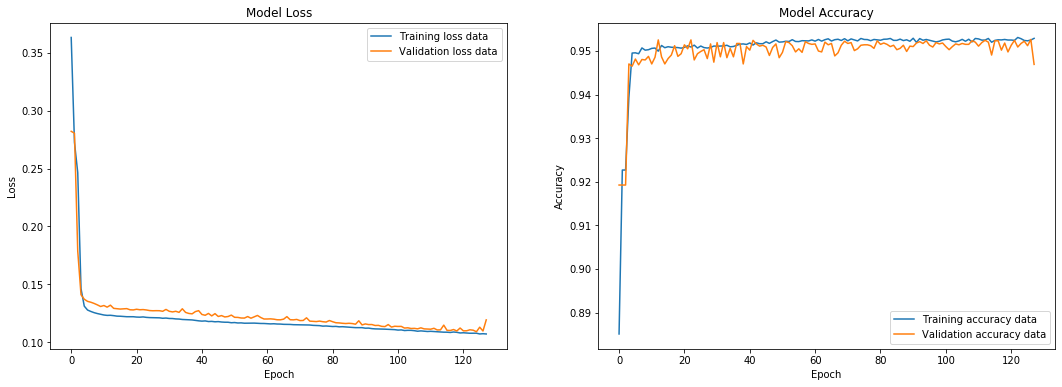

In [170]:
learning_curve(modelBPred2)